In [252]:
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from matplotlib import cm 
from IPython.display import HTML

import pandas as pd

import geopandas as gpd


In [253]:
# sample:
easternmountain = pd.read_parquet("../data/processed/df_easternmountain_train.parquet.gzip")


weather = pd.read_parquet("../data/processed/df_easternmountain_weather.parquet.gzip")

In [254]:
weather['time'] = pd.to_datetime(weather['time'])

weather = weather.groupby(['lat','lon',weather['time'].dt.year, weather['time'].dt.month ]).min()
weather.index.names = ['lat','lon','year','month']
weather = weather.reset_index(['year','month'])

In [255]:
easternmountain['time'] = pd.to_datetime(easternmountain['time'])

easternmountain = easternmountain.set_index(['lat','lon'])

In [256]:
# (lat, lon) from CMIP6
coordinates = set([i for i in weather.index])
coordinates = list(coordinates)

## Visualize one coordinate, one CM, one scenario

In [257]:
easternmountain.loc[35.25,-83.25].head()

time  ACCESS-CM2-ssp126  ACCESS-CM2-ssp245  \
lat   lon                                                       
35.25 -83.25 2015-01-01          -7.283557          -6.431018   
      -83.25 2015-01-02          -3.422027          -1.744683   
      -83.25 2015-01-03          20.447068          21.879260   
      -83.25 2015-01-04          32.446515          30.492143   
      -83.25 2015-01-05          31.311393          32.248857   

              ACCESS-CM2-ssp370  ACCESS-CM2-ssp585  ACCESS-ESM-ssp126  \
lat   lon                                                               
35.25 -83.25          -6.305135          -7.225144          33.185304   
      -83.25          -1.477653          -3.442283          20.172575   
      -83.25          23.253389          21.003485          20.672274   
      -83.25          32.023884          32.616501          16.828735   
      -83.25          31.925612          32.003230          18.548082   

              ACCESS-ESM-ssp245  ACCESS-ESM-ssp370  ACCESS-ESM-ssp585  \
lat   lon                                                               
35.25 -83.25          33.460003          33.449305          33.576870   
      -83.25          19.000375          19.089186          19.291362   
      -83.25          19.684672          20.139108          20.015608   
      -83.25          16.982859          16.966421          17.278543   
      -83.25          19.540106          18.456703          18.498465   

              CMCC-ESM2-ssp126  ...  NorESM2-MM-ssp585  TaiESM1-ssp126  \
lat   lon                       ...                                      
35.25 -83.25         28.603676  ...           8.570106        7.573811   
      -83.25         18.158053  ...          10.473254        6.182022   
      -83.25         21.163089  ...          23.181881       16.712253   
      -83.25         19.140835  ...          22.613998       26.827104   
      -83.25         17.487036  ...          27.672900       23.811206   

              TaiESM1-ssp245  TaiESM1-ssp370  TaiESM1-ssp585  \
lat   lon                                                      
35.25 -83.25       24.536331       12.872902       12.183963   
      -83.25       27.567321       25.973452       25.550465   
      -83.25       43.176216       39.432542       35.739309   
      -83.25       40.452183       36.897529       36.767781   
      -83.25       48.003402       24.275639       21.946524   

              UKESM1-0-L-ssp126  UKESM1-0-L-ssp245  UKESM1-0-L-ssp370  \
lat   lon                                                               
35.25 -83.25          18.011441          18.512184          18.795508   
      -83.25          23.615855          23.802884          23.877041   
      -83.25          43.413658          42.462613          42.262799   
      -83.25          48.363026          47.417021          46.435818   
      -83.25          46.171034          46.658113          45.542753   

              UKESM1-0-L-ssp585  fahrenheit  
lat   lon                                    
35.25 -83.25          18.171154   25.088007  
      -83.25          23.681801   38.588005  
      -83.25          43.239854   43.753998  
      -83.25          45.987288   44.473988  
      -83.25          43.983519   27.536036  

[5 rows x 82 columns]

Text(0.5, 1.0, 'tasmin for (35.25, -83.25) (lat,lon) for CanESM5, ssp126')

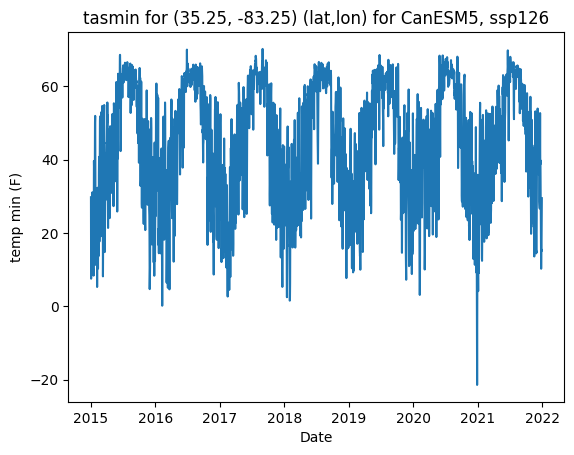

In [258]:
df = easternmountain.loc[35.25,-83.25]
plt.plot(df['time'],df['CanESM5-ssp126'])
plt.ylabel('temp min (F)')
plt.xlabel('Date')
plt.title('tasmin for (35.25, -83.25) (lat,lon) for CanESM5, ssp126')

## Visualize one coordinate, one CM, All scenarios

Text(0.5, 1.0, 'tasmin for (35.25, -83.25) (lat,lon) for CanESM52')

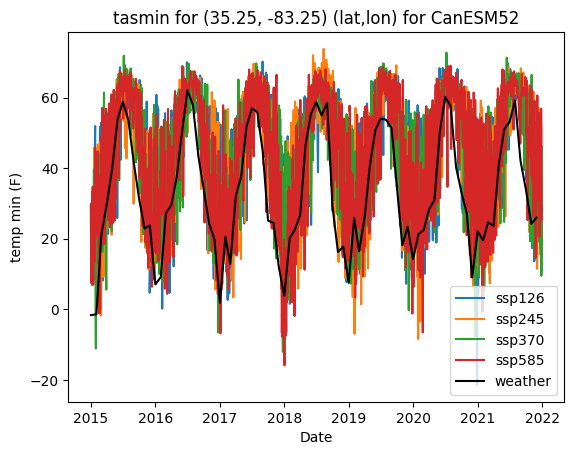

In [261]:
df = easternmountain.loc[35.25,-83.25]
weather_subset = weather[(weather['time'].dt.year >= 2015) & (weather['time'].dt.year <=2021)].loc[35.25,-83.75]


plt.plot(df['time'],df['CanESM5-ssp126'], label = 'ssp126')
plt.plot(df['time'],df['CanESM5-ssp245'], label = 'ssp245')
plt.plot(df['time'],df['CanESM5-ssp370'], label = 'ssp370')
plt.plot(df['time'],df['CanESM5-ssp585'], label = 'ssp585')
plt.plot(weather_subset['time'], weather_subset['fahrenheit'], label = 'weather', color = 'black')

plt.ylabel('temp min (F)')
plt.xlabel('Date')
plt.legend()
plt.title('tasmin for (35.25, -83.25) (lat,lon) for CanESM52')


## Visualize one coordinate, ALL CM, All scenarios

In [98]:
cols =  ['ACCESS-CM2-ssp126', 'ACCESS-CM2-ssp245', 'ACCESS-CM2-ssp370',
       'ACCESS-CM2-ssp585', 'ACCESS-ESM-ssp126', 'ACCESS-ESM-ssp245',
       'ACCESS-ESM-ssp370', 'ACCESS-ESM-ssp585', 'CMCC-ESM2-ssp126',
       'CMCC-ESM2-ssp245', 'CMCC-ESM2-ssp370', 'CMCC-ESM2-ssp585',
       'CNRM-CM6-1-ssp126', 'CNRM-CM6-1-ssp245', 'CNRM-CM6-1-ssp370',
       'CNRM-CM6-1-ssp585', 'CNRM-ESM2--ssp126', 'CNRM-ESM2--ssp245',
       'CNRM-ESM2--ssp370', 'CNRM-ESM2--ssp585', 'CanESM5-ssp126',
       'CanESM5-ssp245', 'CanESM5-ssp370', 'CanESM5-ssp585',
       'EC-Earth3--ssp126', 'EC-Earth3--ssp245', 'EC-Earth3--ssp370',
       'EC-Earth3--ssp585', 'EC-Earth3-ssp126', 'EC-Earth3-ssp245',
       'EC-Earth3-ssp370', 'EC-Earth3-ssp585', 'FGOALS-g3-ssp126',
       'FGOALS-g3-ssp245', 'FGOALS-g3-ssp370', 'FGOALS-g3-ssp585',
       'GFDL-ESM4-ssp126', 'GFDL-ESM4-ssp245', 'GFDL-ESM4-ssp370',
       'GFDL-ESM4-ssp585', 'GISS-E2-1--ssp126', 'GISS-E2-1--ssp245',
       'GISS-E2-1--ssp370', 'GISS-E2-1--ssp585', 'INM-CM4-8-ssp126',
       'INM-CM4-8-ssp245', 'INM-CM4-8-ssp370', 'INM-CM4-8-ssp585',
       'INM-CM5-0-ssp126', 'INM-CM5-0-ssp245', 'INM-CM5-0-ssp370',
       'INM-CM5-0-ssp585', 'KACE-1-0-G-ssp126', 'KACE-1-0-G-ssp245',
       'KACE-1-0-G-ssp370', 'KACE-1-0-G-ssp585', 'MIROC-ES2L-ssp126',
       'MIROC-ES2L-ssp245', 'MIROC-ES2L-ssp370', 'MIROC-ES2L-ssp585',
       'MRI-ESM2-0-ssp126', 'MRI-ESM2-0-ssp245', 'MRI-ESM2-0-ssp370',
       'MRI-ESM2-0-ssp585', 'NorESM2-LM-ssp126', 'NorESM2-LM-ssp245',
       'NorESM2-LM-ssp370', 'NorESM2-LM-ssp585', 'NorESM2-MM-ssp126',
       'NorESM2-MM-ssp245', 'NorESM2-MM-ssp370', 'NorESM2-MM-ssp585',
       'TaiESM1-ssp126', 'TaiESM1-ssp245', 'TaiESM1-ssp370', 'TaiESM1-ssp585',
       'UKESM1-0-L-ssp126', 'UKESM1-0-L-ssp245', 'UKESM1-0-L-ssp370',
       'UKESM1-0-L-ssp585']

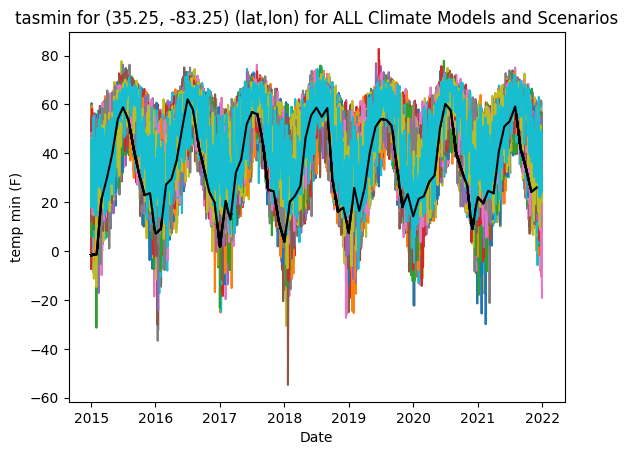

In [111]:
for i in cols:
    plt.plot(df['time'],df[i], label = i)

    plt.plot(weather_subset['time'], weather_subset['fahrenheit'], label = 'weather', color = 'black')

    plt.ylabel('temp min (F)')
    plt.xlabel('Date')
    plt.title('tasmin for (35.25, -83.25) (lat,lon) for ALL Climate Models and Scenarios')


## Map Plots

## One Area, one model, one scenario, multi-time step

In [191]:
df2 = easternmountain.copy()


In [192]:
lat = [i[0] for i in df2.index]
lon = [i[1] for i in df2.index]

In [193]:
 gdf = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(lon,lat), crs="EPSG:4326"
)

In [178]:
dates = pd.date_range(df2.time.min(), df2.time.max(), freq='ME')

In [262]:
colors = 'Blues'

fig, [ax,cax] = plt.subplots(1, 2, figsize = (10,5), gridspec_kw={"width_ratios":[50,1]})

cmap = cm.ScalarMappable(Normalize(-40, 100), colors)

#Create the colorbar with colormap
plt.colorbar(mappable = cmap, cax = cax)
cax.set_title('tsmin')

#We'll pass this function to FuncAnimation to create the animation
def plot_frame(ts):
    
    ax.set_title('Eastern US tsmin (CanESM5-ssp126): {}'.format(dates[ts]))
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')
    
    east.plot(color = 'grey', ax = ax) 

    gdf[(gdf['time'].dt.year == dates[ts].year) & (gdf['time'].dt.month == dates[ts].month) ].plot(column = 'CanESM5-ssp126', ax= ax,
                                          vmin = vmin, vmax=vmax,
                                          cmap = colors)
    
    plt.close()

# To solve for the interval argument in FuncAnimation
# TBD.

anim = FuncAnimation(fig, plot_frame,  
                    #frames = range(0,len(dates)),
                    frames = range(0,10),
                    interval = 100)


HTML(anim.to_jshtml())

In [ ]:
# Save Plot
#anim.save('../reports/ACCESS-CM2-ssp126.gif', writer='pillow')

## One Area, one model, All scenario, multi-time step

Loading all models for all scenarios is not feasible to run locally.

In [263]:
climate_models = set([i[:-6] for i in easternmountain.columns[1:-1]])
climate_models

{'ACCESS-CM2-',
 'ACCESS-ESM-',
 'CMCC-ESM2-',
 'CNRM-CM6-1-',
 'CNRM-ESM2--',
 'CanESM5-',
 'EC-Earth3-',
 'EC-Earth3--',
 'FGOALS-g3-',
 'GFDL-ESM4-',
 'GISS-E2-1--',
 'INM-CM4-8-',
 'INM-CM5-0-',
 'KACE-1-0-G-',
 'MIROC-ES2L-',
 'MRI-ESM2-0-',
 'NorESM2-LM-',
 'NorESM2-MM-',
 'TaiESM1-',
 'UKESM1-0-L-'}

In [265]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
scenarios = ['ssp126','ssp245','ssp370','ssp585']

fig, axs = plt.subplots(2, 3, figsize = (7.5,7.5), gridspec_kw = {"width_ratios":[75,75,75]})

colors = 'Blues'

vmin = -40
vmax = 100

#Create the colorbar with colormap
cmap = cm.ScalarMappable(Normalize(vmin, vmax), colors)

selected_cm = 'UKESM1-0-L'

#We'll pass this function to FuncAnimation to create the animation
def plot_frame(ts):

    gdf2 = gdf[(gdf['time'].dt.year == dates[ts].year) & (gdf['time'].dt.month == dates[ts].month)][[f'{selected_cm}-ssp126',f'{selected_cm}-ssp245',f'{selected_cm}-ssp370',f'{selected_cm}-ssp585','fahrenheit','geometry']]

    east.plot(color = 'grey', ax = axs[0,0]) 
    gdf2.plot(column = f'{selected_cm}-ssp126', ax= axs[0,0], vmin = vmin, vmax=vmax, cmap = colors)
    axs[0, 0].set_title(f'{selected_cm}-ssp126')

    east.plot(color = 'grey', ax = axs[0,1]) 
    gdf2.plot(column = f'{selected_cm}-ssp245', ax= axs[0,1], vmax=vmax, cmap = colors)
    axs[0, 1].set_title(f'{selected_cm}-ssp245')

    east.plot(color = 'grey', ax = axs[1,0]) 
    gdf2.plot(column = f'{selected_cm}-ssp370', ax= axs[1,0], vmax=vmax, cmap = colors)
    axs[1, 0].set_title(f'{selected_cm}-ssp370')

    east.plot(color = 'grey', ax = axs[1,1]) 
    gdf2.plot(column = f'{selected_cm}-ssp585', ax= axs[1,1], vmax=vmax, cmap = colors)
    axs[1, 1].set_title(f'{selected_cm}-ssp585')

    # Weather Data
    east.plot(color = 'grey', ax = axs[0,2]) 
    gdf2.plot(column = 'fahrenheit', ax= axs[0,2], vmax=vmax, cmap = colors)
    axs[0, 2].set_title('Ground Truth: Fahrenheit')


    # https://matplotlib.org/stable/users/explain/axes/colorbar_placement.html
    fig.colorbar(mappable = cmap, cax = axs[1,2], location = 'right', shrink = 0.6)
    axs[1, 2].set_title('tasmin (Fahrenheit)')

    fig.suptitle(f'US East [{selected_cm}]: {dates[ts].year}-{dates[ts].month}-01') 

    plt.close()

# To solve for the interval argument in FuncAnimation
# TBD.

anim = FuncAnimation(fig, plot_frame,  
                    frames = range(0,len(dates)),
                    #frames = range(0,2),
                    interval = 100)


HTML(anim.to_jshtml())

In [251]:
anim.save(f'../reports/{selected_cm}-all-ssp.gif', writer='pillow')
